<a href="https://colab.research.google.com/github/nayonsoso/Pytorch/blob/main/tsaug%20%EC%84%A4%EC%B9%98%EB%B0%A9%EB%B2%95%2C%20%EC%8B%A4%ED%96%89%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tsaug

tsaug는 시계열 데이터 증강을 위한 파이토치 패키지이다.

## installation

① tsaug 설치

② 드라이브 마운트 - 실습 깃허브 파일 다운로드

③ 드라이브 내부에서 실행 경로 설정

In [31]:
!pip install tsaug

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install
"""
!cd "/content/drive/MyDrive/Colab Notebooks/22 봄 학부연구생"
!git clone https://github.com/arundo/tsaug.git
!cd tsaug/
!git checkout develop
!pip install ./
"""

fatal: destination path 'tsaug' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
ERROR: Directory './' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [26]:
# 실행 경로 설정
%cd "/content/drive/MyDrive/Colab Notebooks/22 봄 학부연구생/tsaug/docs/notebook"

/content/drive/MyDrive/Colab Notebooks/22 봄 학부연구생/tsaug/docs/notebook


## 다변수 시계열 데이터 증강

### Load

(<Figure size 1152x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff410ee1d10>,
       dtype=object))

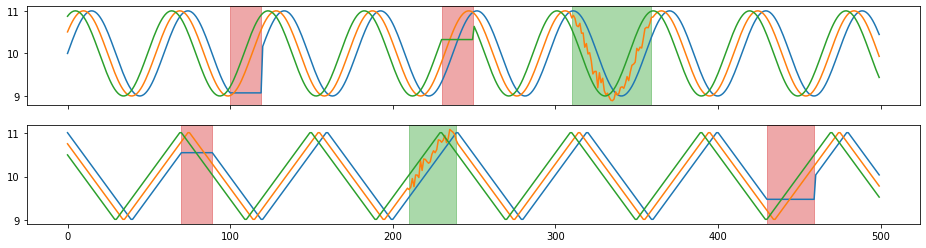

In [32]:
import numpy as np
X = np.load("X.npy")
Y = np.load("./Y.npy")
from tsaug.visualization import plot
plot(X, Y)

### Build a pipeline

- 랜덤하게 5번 wrapping(왜곡)

- 랜덤하게 길이 300으로 crop(자르기)

- 랜덤하게 quantize to 10-, 20-, or 30- level sets,

- 랜덤하게 드리프트 with 80% probability , random drift the signal up to 10% - 50%,

- 리버스 with 50% probability, reverse the sequence.

In [33]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

my_augmenter = (
     TimeWarp() * 5  # random time warping 5 times in parallel
     + Crop(size=300)  # random crop subsequences with length 300
     + Quantize(n_levels=[10, 20, 30])  # random quantize to 10-, 20-, or 30- level sets...     
     + Drift(max_drift=(0.1, 0.5)) @ 0.8  # with 80% probability, random drift the signal up to 10% - 50%
     + Reverse() @ 0.5  # with 50% probability, reverse the sequence
 )

(<Figure size 1152x1440 with 10 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3ff3ee510>,
       dtype=object))

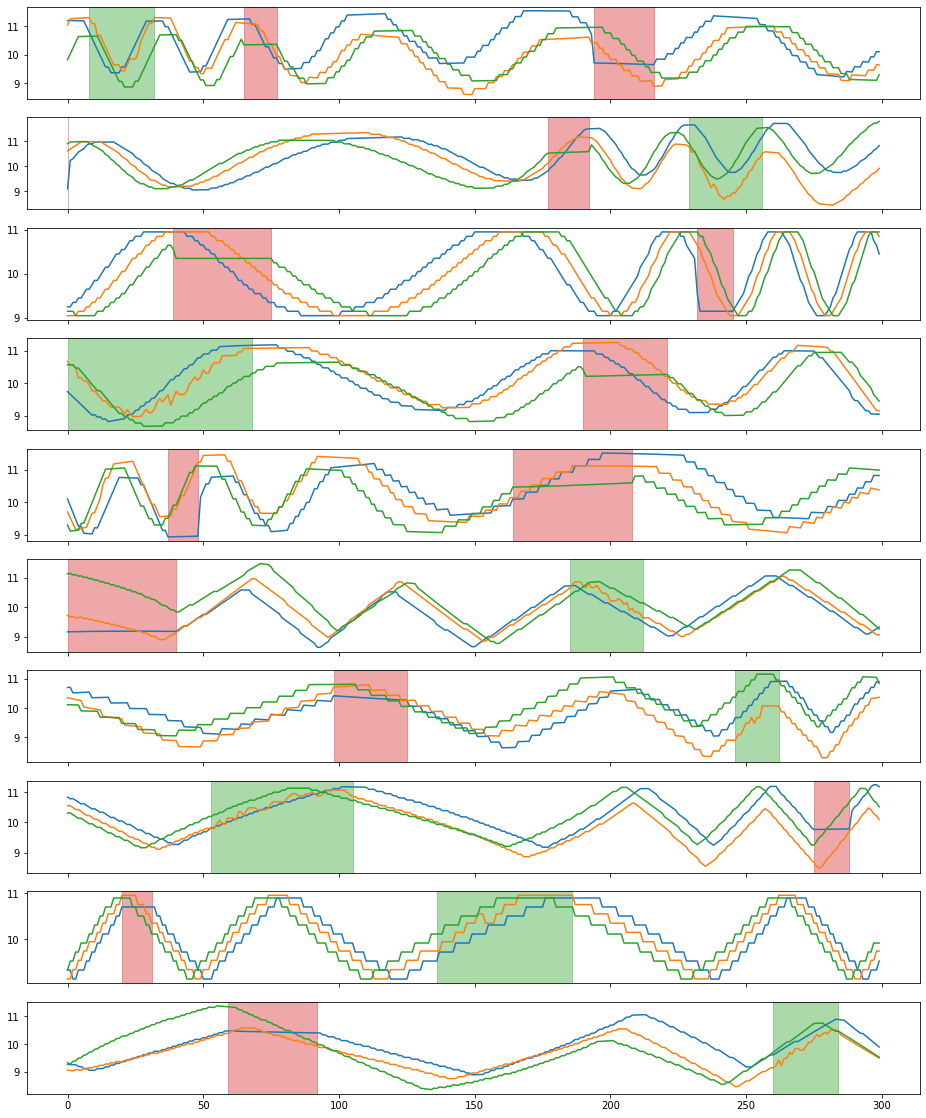

In [34]:
X_aug, Y_aug = my_augmenter.augment(X, Y)
plot(X_aug, Y_aug)